In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import quantstream as qs
import os
import xarray as xr
import numpy as np
import warnings

warnings.filterwarnings("ignore")

## Introduction

Im this notebook, we'll demonstrate some of the most common techniques used to preprocess financial timeseries data. I'd recomend checking out the following resources for more information on the topic:

- [Python for Finance, 2nd Edition](https://learning.oreilly.com/library/view/python-for-finance/9781492024323/) by Yves Hilpisch

In [3]:
ds_intra = qs.timeseries.get_daily(
    symbol="AAPL",
    from_date="2024-10-01",
    to_date="2024-10-31",
)
ds_intra.to_dataframe().head()

,open,high,low,close,adjClose,volume
time,,,,,,
2024-10-31,229.34,229.83,225.37,225.91,225.66,64370100
2024-10-30,232.61,233.47,229.55,230.10,229.85,47070907
2024-10-29,233.10,234.33,232.32,233.67,233.41,35417247
2024-10-28,233.32,234.73,232.55,233.40,233.14,36087134
2024-10-25,229.74,233.22,229.57,231.41,231.16,38802304


### Returns and Log Returns

The most common way to preprocess financial timeseries data is to calculate the returns. The return is defined as the percentage change in the price of an asset from one period to the next. The return is calculated as follows:

$$
r_t = \frac{P_t - P_{t-1}}{P_{t-1}}
$$

Where $P_t$ is the price of the asset at time $t$. The log return is defined as the natural logarithm of the return:

$$
r_t = \log\left(\frac{P_t}{P_{t-1}}\right)
$$

The log return is often preferred over the simple return because it is additive. That is, the log return of a series of returns is equal to the sum of the log returns of the individual returns. This property makes the log return easier to work with in many cases.

In [4]:
df_intra = ds_intra.to_dataframe()
df_intra["return"] = df_intra["adjClose"].pct_change()

<Axes: xlabel='time'>

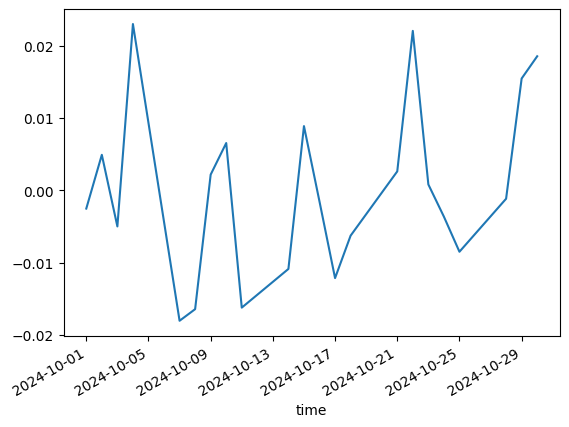

In [5]:
df_intra["return"].plot()

<Axes: xlabel='time'>

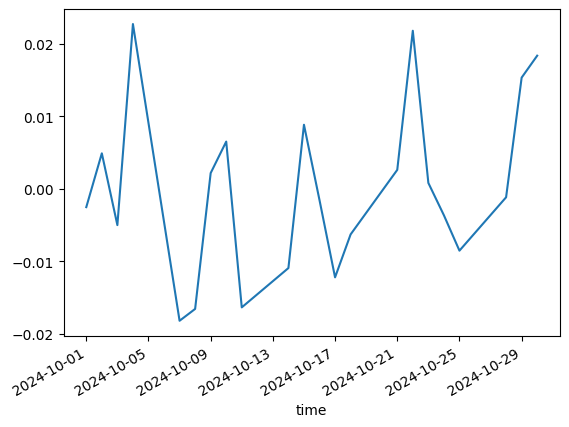

In [6]:
df_intra["log_return"] = np.log(df_intra["adjClose"] / df_intra["adjClose"].shift(1))
df_intra["log_return"].plot()